# SWMT regions prescribed experiments

In [1]:
import intake
import glob
from pathlib import Path
import cartopy.crs as ccrs
import cf_xarray as cfxr
import cmocean as cm
import dask.distributed
import gsw
import matplotlib.pyplot as plt
from matplotlib import gridspec 
import matplotlib.colors as mcolors
import matplotlib.path as mpath
import numpy as np
import xarray as xr
import pdb
import os
import pathlib
import shutil

import warnings # ignore these warnings
warnings.filterwarnings("ignore", category = FutureWarning)
warnings.filterwarnings("ignore", category = UserWarning)
warnings.filterwarnings("ignore", category = RuntimeWarning)

In [2]:
#Starting a dask client
from os import environ
environ["PYTHONWARNINGS"] = "ignore"

from dask.distributed import Client
client = Client(threads_per_worker = 1)
client

Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: /proxy/8787/status,
Dashboard: /proxy/8787/status,Workers: 28
Total threads: 28,Total memory: 125.19 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:36529,Workers: 0
Dashboard: /proxy/8787/status,Total threads: 0
Started: Just now,Total memory: 0 B
Comm: tcp://127.0.0.1:45235,Total threads: 1
Dashboard: /proxy/38555/status,Memory: 4.47 GiB
Nanny: tcp://127.0.0.1:40363,


## Importing the saved files

In [3]:
save_dir = '/g/data/g40/kc5856/access_panan_ssp126_SWMT/new_Pan01_SWMT_shelf_rho0/plots/'
save_dir_acc = '/g/data/g40/kc5856/access_panan_ssp126_SWMT/new_ACCESS_SWMT_shelf_rho0/plots/'

In [4]:
# non time averaged data

Adelie_01_C = xr.open_dataset(save_dir + 'swmt_shelf_sum_C_form_Adelie_prescribed_pan01.nc').to_array().squeeze()
Adelie_01_M = xr.open_dataset(save_dir + 'swmt_shelf_sum_M_form_Adelie_prescribed_pan01.nc').to_array().squeeze()
Adelie_ac_C = xr.open_dataset(save_dir_acc + 'swmt_shelf_sum_C_form_Adelie_prescribed_access.nc').to_array().squeeze()
Adelie_ac_M = xr.open_dataset(save_dir_acc + 'swmt_shelf_sum_M_form_Adelie_prescribed_access.nc').to_array().squeeze()

Ross_01_C = xr.open_dataset(save_dir + 'swmt_shelf_sum_C_form_Ross_prescribed_pan01.nc').to_array().squeeze()
Ross_01_M = xr.open_dataset(save_dir + 'swmt_shelf_sum_M_form_Ross_prescribed_pan01.nc').to_array().squeeze()
Ross_ac_C = xr.open_dataset(save_dir_acc + 'swmt_shelf_sum_C_form_Ross_prescribed_access.nc').to_array().squeeze()
Ross_ac_M = xr.open_dataset(save_dir_acc + 'swmt_shelf_sum_M_form_Ross_prescribed_access.nc').to_array().squeeze()

Weddell_01_C = xr.open_dataset(save_dir + 'swmt_shelf_sum_C_form_Weddell_prescribed_pan01.nc').to_array().squeeze()
Weddell_01_M = xr.open_dataset(save_dir + 'swmt_shelf_sum_M_form_Weddell_prescribed_pan01.nc').to_array().squeeze()
Weddell_ac_C = xr.open_dataset(save_dir_acc + 'swmt_shelf_sum_C_form_Weddell_prescribed_access.nc').to_array().squeeze()
Weddell_ac_M = xr.open_dataset(save_dir_acc + 'swmt_shelf_sum_M_form_Weddell_prescribed_access.nc').to_array().squeeze()

Prydz_01_C = xr.open_dataset(save_dir + 'swmt_shelf_sum_C_form_Prydz_prescribed_pan01.nc').to_array().squeeze()
Prydz_01_M = xr.open_dataset(save_dir + 'swmt_shelf_sum_M_form_Prydz_prescribed_pan01.nc').to_array().squeeze()
Prydz_ac_C = xr.open_dataset(save_dir_acc + 'swmt_shelf_sum_C_form_Prydz_prescribed_access.nc').to_array().squeeze()
Prydz_ac_M = xr.open_dataset(save_dir_acc + 'swmt_shelf_sum_M_form_Prydz_prescribed_access.nc').to_array().squeeze()

In [5]:
# time averaged data

Adelie_01_C_map = xr.open_dataset(save_dir + 'swmt_shelf_sum_ave_C_form_Adelie_prescribed_pan01.nc').to_array().squeeze()
Adelie_01_M_map = xr.open_dataset(save_dir + 'swmt_shelf_sum_ave_M_form_Adelie_prescribed_pan01.nc').to_array().squeeze()
Adelie_ac_C_map = xr.open_dataset(save_dir_acc + 'swmt_shelf_sum_ave_C_form_Adelie_prescribed_access.nc').to_array().squeeze()
Adelie_ac_M_map = xr.open_dataset(save_dir_acc + 'swmt_shelf_sum_ave_M_form_Adelie_prescribed_access.nc').to_array().squeeze()

Weddell_01_C_map = xr.open_dataset(save_dir + 'swmt_shelf_sum_ave_C_form_Weddell_prescribed_pan01.nc').to_array().squeeze()
Weddell_01_M_map = xr.open_dataset(save_dir + 'swmt_shelf_sum_ave_M_form_Weddell_prescribed_pan01.nc').to_array().squeeze()
Weddell_ac_C_map = xr.open_dataset(save_dir_acc + 'swmt_shelf_sum_ave_C_form_Weddell_prescribed_access.nc').to_array().squeeze()
Weddell_ac_M_map = xr.open_dataset(save_dir_acc + 'swmt_shelf_sum_ave_M_form_Weddell_prescribed_access.nc').to_array().squeeze()

Prydz_01_C_map = xr.open_dataset(save_dir + 'swmt_shelf_sum_ave_C_form_Prydz_prescribed_pan01.nc').to_array().squeeze()
Prydz_01_M_map = xr.open_dataset(save_dir + 'swmt_shelf_sum_ave_M_form_Prydz_prescribed_pan01.nc').to_array().squeeze()
Prydz_ac_C_map = xr.open_dataset(save_dir_acc + 'swmt_shelf_sum_ave_C_form_Prydz_prescribed_access.nc').to_array().squeeze()
Prydz_ac_M_map = xr.open_dataset(save_dir_acc + 'swmt_shelf_sum_ave_M_form_Prydz_prescribed_access.nc').to_array().squeeze()

Ross_01_C_map = xr.open_dataset(save_dir + 'swmt_shelf_sum_ave_C_form_Ross_prescribed_pan01.nc').to_array().squeeze()
Ross_01_M_map = xr.open_dataset(save_dir + 'swmt_shelf_sum_ave_M_form_Ross_prescribed_pan01.nc').to_array().squeeze()
Ross_ac_C_map = xr.open_dataset(save_dir_acc + 'swmt_shelf_sum_ave_C_form_Ross_prescribed_access.nc').to_array().squeeze()
Ross_ac_M_map = xr.open_dataset(save_dir_acc + 'swmt_shelf_sum_ave_M_form_Ross_prescribed_access.nc').to_array().squeeze()

In [6]:
# Calculate anomalies
Adelie_01 = Adelie_01_M_map - Adelie_01_C_map
Adelie_ac = Adelie_ac_M_map - Adelie_ac_C_map

Weddell_01 = Weddell_01_M_map - Weddell_01_C_map
Weddell_ac = Weddell_ac_M_map - Weddell_ac_C_map

Prydz_01 = Prydz_01_M_map - Prydz_01_C_map
Prydz_ac = Prydz_ac_M_map - Prydz_ac_C_map

Ross_01 = Ross_01_M_map - Ross_01_C_map
Ross_ac = Ross_ac_M_map - Ross_ac_C_map

In [7]:
# This is whole shelf average
pan01_25 = 27.89
pan01_75 = 27.73 

# Thresholds from pan01 regional data
Ad_25 = 27.77
Ad_75 = 27.71

Ro_25 = 28.03
Ro_75 = 27.95

We_25 = 27.85
We_75 = 27.81

Pr_25 = 27.77
Pr_75 = 27.73

In [8]:
# 25th percentile for each region
p25_list = [Ad_25, Ro_25, We_25, Pr_25]

# 75th percentile for each region
p75_list = [Ad_75, Ro_75, We_75, Pr_75]

# Plotting

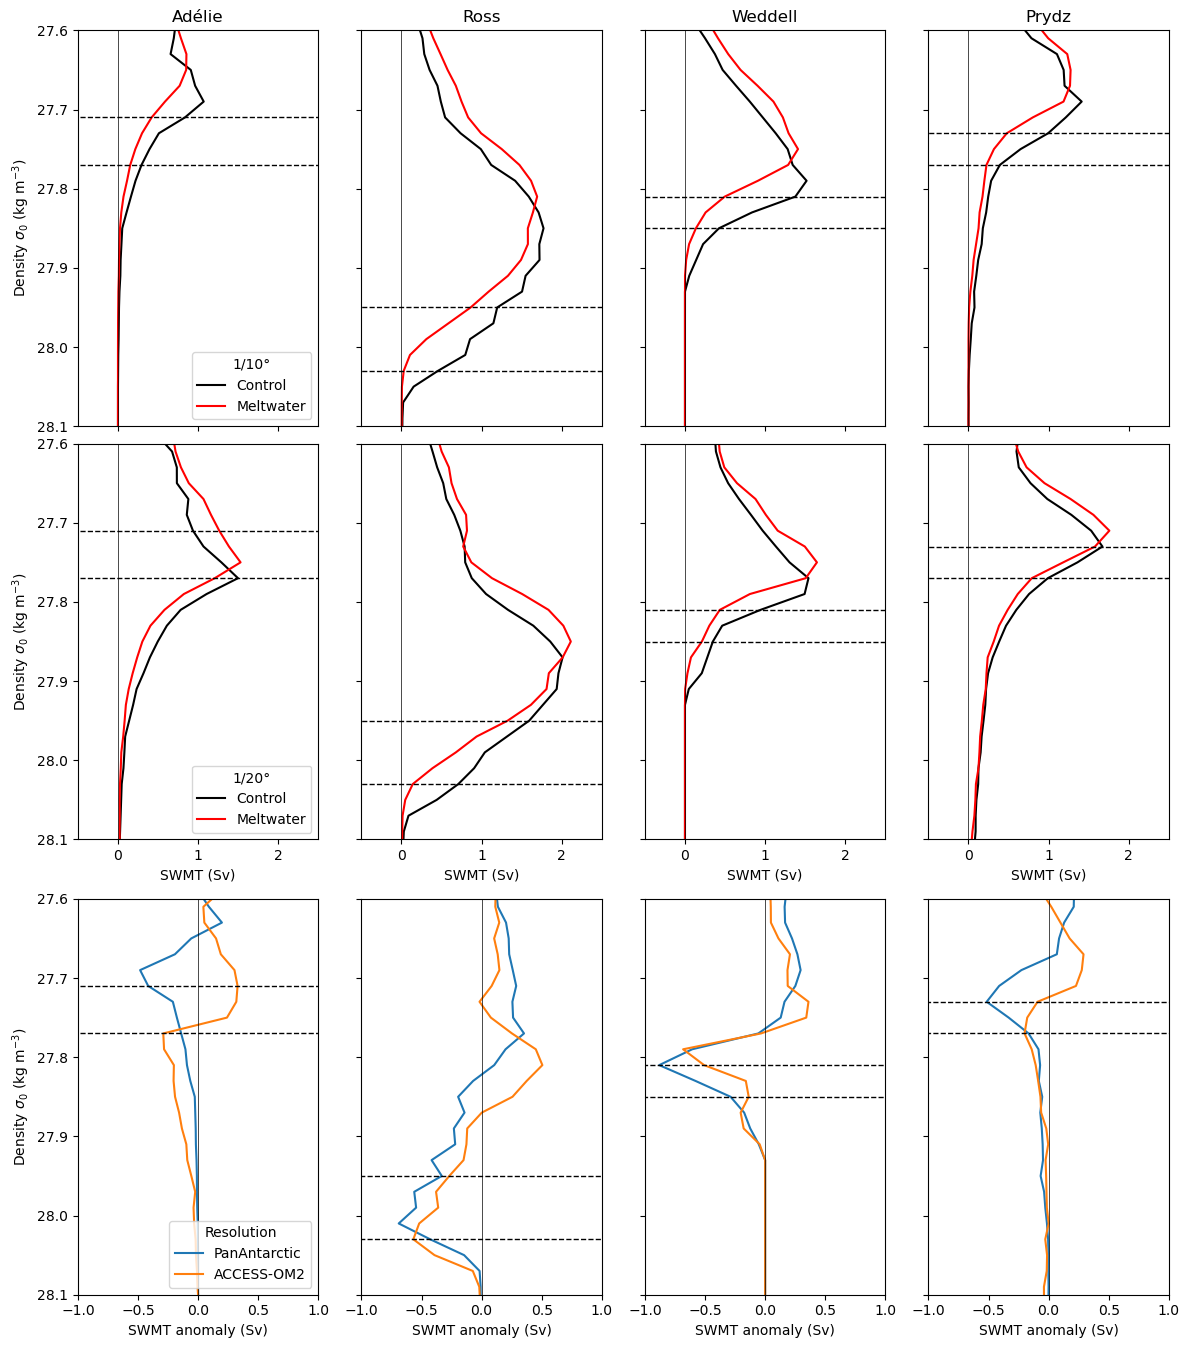

In [15]:
import matplotlib.pyplot as plt

# ---- DATA ----
controls_01 = [Adelie_01_C_map, Ross_01_C_map, Weddell_01_C_map, Prydz_01_C_map]
melts_01    = [Adelie_01_M_map, Ross_01_M_map, Weddell_01_M_map, Prydz_01_M_map]

controls_ac = [Adelie_ac_C_map, Ross_ac_C_map, Weddell_ac_C_map, Prydz_ac_C_map]
melts_ac    = [Adelie_ac_M_map, Ross_ac_M_map, Weddell_ac_M_map, Prydz_ac_M_map]

pan01  = [Adelie_01, Ross_01, Weddell_01, Prydz_01]
access = [Adelie_ac, Ross_ac, Weddell_ac, Prydz_ac]

titles = ["Adélie", "Ross", "Weddell", "Prydz"]

# ---- FIGURE ----
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(12, 14), sharey=True)

for j, title in enumerate(titles):
    # --- Row 1: 1/10 Control vs Melt ---
    ax = axes[0, j]
    ax.plot(controls_01[j], controls_01[j]['isopycnal_bins'], color='k', label='Control')
    ax.plot(melts_01[j], melts_01[j]['isopycnal_bins'], color='r', label='Meltwater')
    ax.plot([0, 0], [26.5, 28.48], 'k', linewidth=0.5)
    ax.plot([-5, 15], [p25_list[j], p25_list[j]], 'k--', linewidth=1)
    ax.plot([-5, 15], [p75_list[j], p75_list[j]], 'k--', linewidth=1)
    ax.set_ylim((28.1, 27.6))
    ax.set_xlim((-0.5, 2.5))
    ax.set_title(title)
    # hide x labels for first row
    ax.set_xlabel('')
    ax.tick_params(labelbottom=False)

    # --- Row 2: 1/20 Control vs Melt ---
    ax = axes[1, j]
    ax.plot(controls_ac[j], controls_ac[j]['isopycnal_bins'], color='k', label='Control')
    ax.plot(melts_ac[j], melts_ac[j]['isopycnal_bins'], color='r', label='Meltwater')
    ax.plot([0, 0], [26.5, 28.48], 'k', linewidth=0.5)
    ax.plot([-5, 15], [p25_list[j], p25_list[j]], 'k--', linewidth=1)
    ax.plot([-5, 15], [p75_list[j], p75_list[j]], 'k--', linewidth=1)
    ax.set_ylim((28.1, 27.6))
    ax.set_xlim((-0.5, 2.5))
    
    # --- Row 3: Resolution comparison ---
    ax = axes[2, j]
    ax.plot(pan01[j], pan01[j]['isopycnal_bins'], label='PanAntarctic')
    ax.plot(access[j], access[j]['isopycnal_bins'], label='ACCESS-OM2')
    ax.plot([0, 0], [26.5, 28.48], 'k', linewidth=0.5)
    ax.plot([-5, 15], [p25_list[j], p25_list[j]], 'k--', linewidth=1)
    ax.plot([-5, 15], [p75_list[j], p75_list[j]], 'k--', linewidth=1)
    ax.set_ylim((28.1, 27.6))
    ax.set_xlim((-1, 1))

# ---- Labels and legends ----
for i in range(3):
    axes[i, 0].set_ylabel('Density $\sigma_0$ (kg m$^{-3}$)')

for j in range(4):
    axes[1, j].set_xlabel('SWMT (Sv)')
    axes[2, j].set_xlabel('SWMT anomaly (Sv)')

axes[0, 0].legend(loc='lower right', title="1/10°")
axes[1, 0].legend(loc='lower right', title="1/20°")
axes[2, 0].legend(loc='lower right', title="Resolution")

plt.tight_layout()

plt.subplots_adjust(hspace=0.15)   # controls row spacing overall
for ax in axes[0]:  # push row 1 slightly down
    pos = ax.get_position()
    ax.set_position([pos.x0, pos.y0 - 0.03, pos.width, pos.height])

plt.show()

Finding 25-75 thresholds based on pan01 data:  
- Adelie max = 1.069236 Sv
    - 25%: 0.267309 Sv at 27.77
    - 75%: 0.801927 Sv at 27.71
      
- Ross max = 1.77162232 Sv
    - 25%: 0.44290558 Sv at 28.03
    - 75%: 1.32871674 Sv at 27.95 
      
- Weddell max = 1.51656787 Sv
    - 25%: 0.3791419675 Sv at 27.85
    - 75%: 1.1374259025 Sv at 27.81
      
- Prydz max = 1.41193174 Sv
    - 25%: 0.352982935 Sv at 27.77
    - 75%: 1.058948805 Sv at 27.73

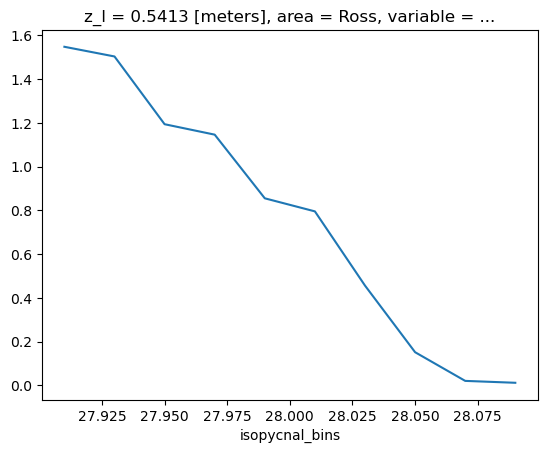

In [117]:
# Finding maximum
Ross_01_C_map.sel(isopycnal_bins=slice(27.9,28.1)).plot() # Pick slice based on plot, test for max value

In [28]:
max_value = 28.03
Ross_01_C_map.sel(isopycnal_bins=str(max_value),method='nearest').load()

<xarray.DataArray ()> Size: 8B
array(0.45623112)
Coordinates:
    isopycnal_bins  float64 8B 28.03
    z_l             float64 8B 0.5413
    area            <U4 16B 'Ross'
    variable        <U29 116B '__xarray_dataarray_variable__'

# Time series

In [9]:
# Open data

Adelie_01_C = xr.open_dataset(save_dir + 'swmt_shelf_sum_C_form_Adelie_prescribed_pan01.nc').to_array().squeeze()
Adelie_01_M = xr.open_dataset(save_dir + 'swmt_shelf_sum_M_form_Adelie_prescribed_pan01.nc').to_array().squeeze()
Adelie_ac_C = xr.open_dataset(save_dir_acc + 'swmt_shelf_sum_C_form_Adelie_prescribed_access.nc').to_array().squeeze()
Adelie_ac_M = xr.open_dataset(save_dir_acc + 'swmt_shelf_sum_M_form_Adelie_prescribed_access.nc').to_array().squeeze()

Ross_01_C = xr.open_dataset(save_dir + 'swmt_shelf_sum_C_form_Ross_prescribed_pan01.nc').to_array().squeeze()
Ross_01_M = xr.open_dataset(save_dir + 'swmt_shelf_sum_M_form_Ross_prescribed_pan01.nc').to_array().squeeze()
Ross_ac_C = xr.open_dataset(save_dir_acc + 'swmt_shelf_sum_C_form_Ross_prescribed_access.nc').to_array().squeeze()
Ross_ac_M = xr.open_dataset(save_dir_acc + 'swmt_shelf_sum_M_form_Ross_prescribed_access.nc').to_array().squeeze()

Weddell_01_C = xr.open_dataset(save_dir + 'swmt_shelf_sum_C_form_Weddell_prescribed_pan01.nc').to_array().squeeze()
Weddell_01_M = xr.open_dataset(save_dir + 'swmt_shelf_sum_M_form_Weddell_prescribed_pan01.nc').to_array().squeeze()
Weddell_ac_C = xr.open_dataset(save_dir_acc + 'swmt_shelf_sum_C_form_Weddell_prescribed_access.nc').to_array().squeeze()
Weddell_ac_M = xr.open_dataset(save_dir_acc + 'swmt_shelf_sum_M_form_Weddell_prescribed_access.nc').to_array().squeeze()

Prydz_01_C = xr.open_dataset(save_dir + 'swmt_shelf_sum_C_form_Prydz_prescribed_pan01.nc').to_array().squeeze()
Prydz_01_M = xr.open_dataset(save_dir + 'swmt_shelf_sum_M_form_Prydz_prescribed_pan01.nc').to_array().squeeze()
Prydz_ac_C = xr.open_dataset(save_dir_acc + 'swmt_shelf_sum_C_form_Prydz_prescribed_access.nc').to_array().squeeze()
Prydz_ac_M = xr.open_dataset(save_dir_acc + 'swmt_shelf_sum_M_form_Prydz_prescribed_access.nc').to_array().squeeze()

In [10]:
regions = {
    'Adelie': {'25': Ad_25, '75': Ad_75},
    'Ross': {'25': Ro_25, '75': Ro_75},
    'Weddell': {'25': We_25, '75': We_75},
    'Prydz': {'25': Pr_25, '75': Pr_75}
}

resolutions = ['01', 'ac']

# store results and differences in a dictionary
swmt_time = {}
swmt_diff = {}  # M - C differences

for region_name, bounds in regions.items():
    swmt_time[region_name] = {}
    swmt_diff[region_name] = {}
    for res in resolutions:
        # fetch the datasets
        ds_C = globals()[f"{region_name}_{res}_C"]
        ds_M = globals()[f"{region_name}_{res}_M"]
        
        # compute mean over isopycnal_bins
        ds_C_time = ds_C.sel(isopycnal_bins=slice(bounds['75'], bounds['25'])).mean('isopycnal_bins').compute()
        ds_M_time = ds_M.sel(isopycnal_bins=slice(bounds['75'], bounds['25'])).mean('isopycnal_bins').compute()
        
        # store in dictionary
        swmt_time[region_name][res] = {'C': ds_C_time, 'M': ds_M_time}
        
        # compute difference M - C
        swmt_diff[region_name][res] = ds_M_time - ds_C_time

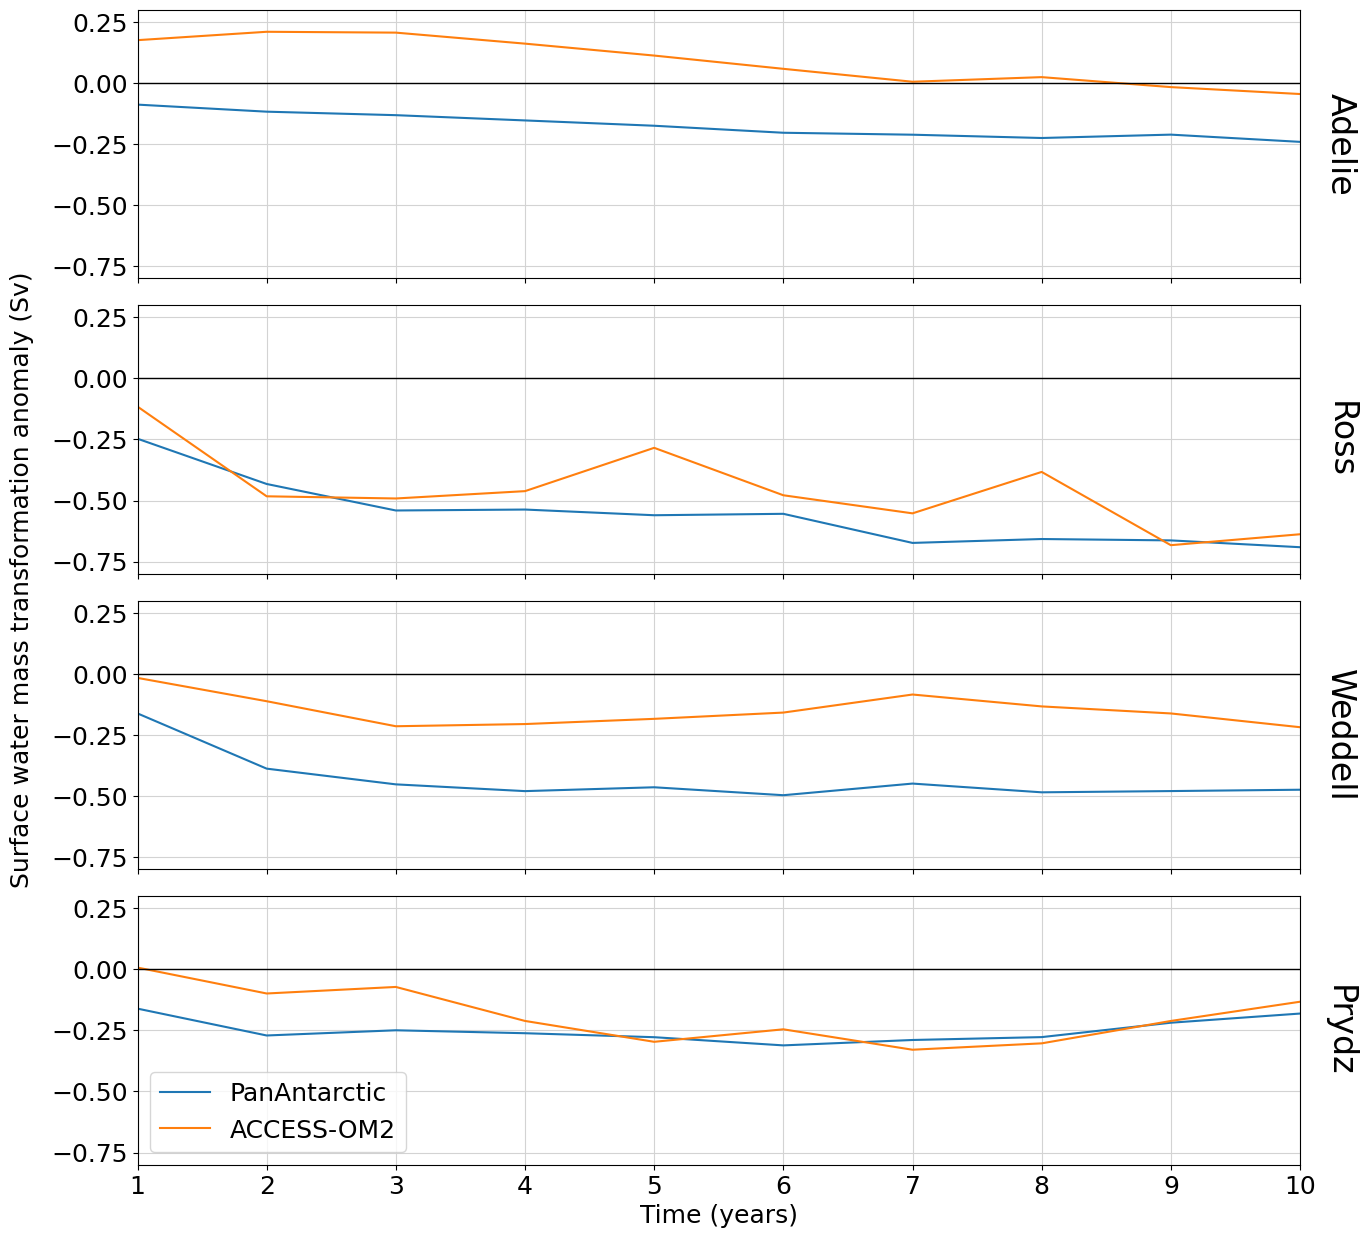

In [11]:
plt.rcParams['font.size'] = 18

regions_order = ['Adelie', 'Ross', 
                 'Weddell', 'Prydz']

fig, axes = plt.subplots(
    nrows=4, ncols=1, figsize=(15, 15),
    sharey=True, sharex=True,
    gridspec_kw={'hspace': 0.1}  # remove vertical spacing
)
axes = axes.flatten()

for i, (ax, region) in enumerate(zip(axes, regions_order)):
    for res, label in zip(['01', 'ac'], ['PanAntarctic', 'ACCESS-OM2']):
        data = swmt_diff[region][res]
        
        shifted_time = data['time'].values + 1
        data_shifted = xr.DataArray(data.values, coords=[shifted_time], dims=['time'])
        
        data_shifted.plot(ax=ax, label=label, add_legend=False)

    ax.axhline(y=0, linewidth=1, color='k')
    ax.set_xlim(1, 10)
    ax.set_ylim(-0.8, 0.3)
    ax.grid(True, color='lightgrey')

    # Add region name on right-hand side, vertical orientation
    ax.text(1.02, 0.5, region, transform=ax.transAxes,
            va='center', ha='left', fontsize=24, rotation=270)

    if i == len(axes) - 1:
        ax.set_xlabel('Time (years)')
        ax.legend()
    else:
        ax.set_xlabel('')

# One shared y-axis label
fig.text(0.04, 0.5, "Surface water mass transformation anomaly (Sv)", va='center', rotation='vertical')

plt.tight_layout(rect=[0.06, 0, 1, 1])  # leave space for ylabel
plt.show()


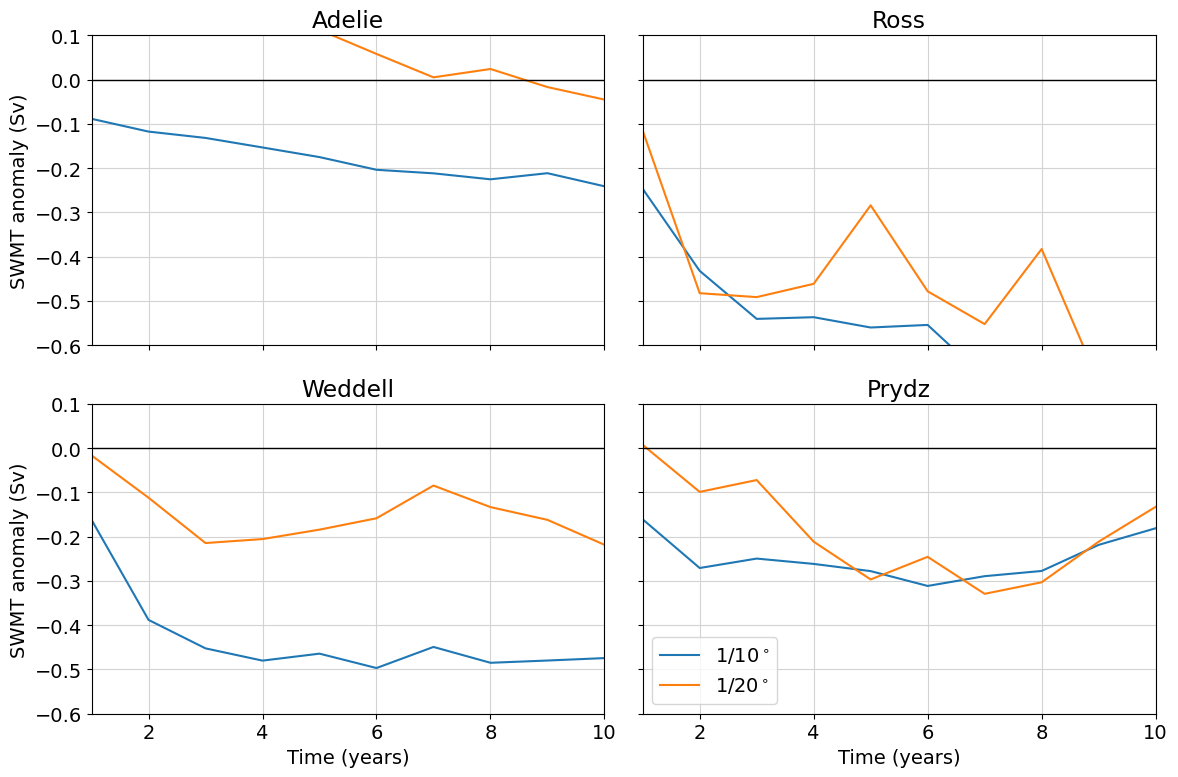

In [14]:
plt.rcParams['font.size'] = 14

regions_order = ['Adelie', 'Ross', 
                 'Weddell', 'Prydz']

# Create 2x2 grid
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8), sharey=True, sharex=True)
axes = axes.flatten()  # flatten for easy iteration

for i, (ax, region) in enumerate(zip(axes, regions_order)):
    for res, label in zip(['01', 'ac'], ['1/10$^\circ$', '1/20$^\circ$']):
        data = swmt_diff[region][res]
        
        # Shift time by +1 to go from 1–10
        shifted_time = data['time'].values + 1
        data_shifted = xr.DataArray(data.values, coords=[shifted_time], dims=['time'])
        
        # Plot without auto legend
        data_shifted.plot(ax=ax, label=label, add_legend=False)

    # Horizontal line at 0
    ax.axhline(0, color='k', linewidth=1)
    
    ax.set_xlim(1, 10)
    ax.set_ylim(-0.6, 0.1)
    ax.set_title(region)
    ax.grid(True, color='lightgrey')

    # Y-axis label only for Adelie & Weddell
    if region in ['Adelie', 'Weddell']:
        ax.set_ylabel("SWMT anomaly (Sv)")
    else:
        ax.set_ylabel("")

    # X-axis label only for bottom row (Weddell & Prydz)
    if region in ['Weddell', 'Prydz']:
        ax.set_xlabel("Time (years)")
    else:
        ax.set_xlabel("")

    # Add legend only in bottom-right (Prydz)
    if region == 'Prydz':
        ax.legend()

plt.tight_layout()
plt.show()


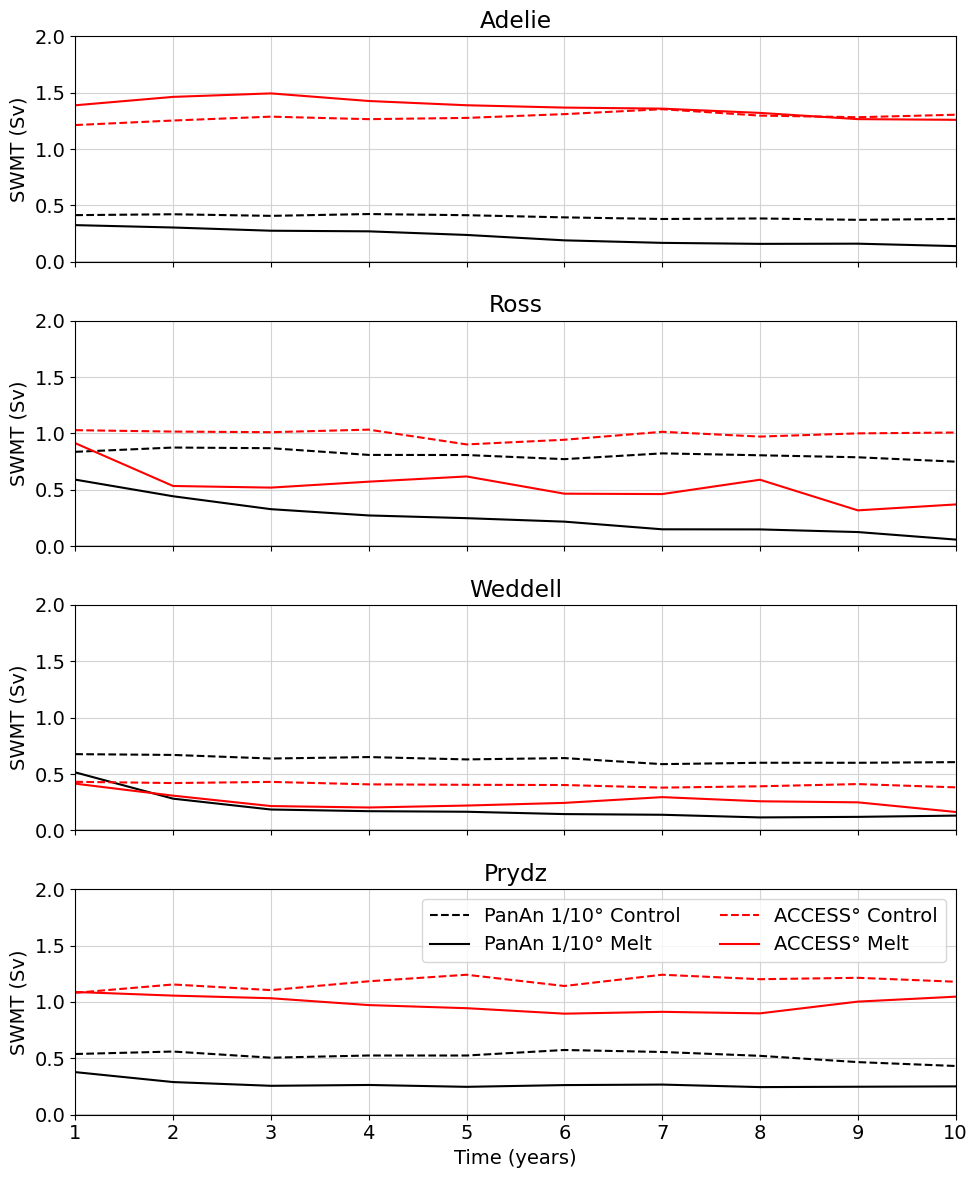

In [20]:
regions_order = ['Adelie', 'Ross', 'Weddell', 'Prydz']

fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(10, 12), sharey=True, sharex=True)
axes = axes.flatten()

for i, (ax, region) in enumerate(zip(axes, regions_order)):
    for res, color, res_label in zip(['01', 'ac'], ['k', 'r'], ['PanAn 1/10°', 'ACCESS°']):
        for exp, linestyle in zip(['C', 'M'], ['--', '-']):  # dashed = Control, solid = Melt
            data = swmt_time[region][res][exp]

            # Shift time by +1 to go from 1–10
            shifted_time = data['time'].values + 1
            data_shifted = xr.DataArray(data.values, coords=[shifted_time], dims=['time'])

            label = f"{res_label} {'Control' if exp=='C' else 'Melt'}"
            data_shifted.plot(ax=ax, label=label, add_legend=False,
                              color=color, linestyle=linestyle)

    # Horizontal line at zero
    ax.axhline(0, color='k', linewidth=1)

    ax.set_xlim(1, 10)
    ax.set_ylim(0, 2)
    ax.set_ylabel("SWMT (Sv)")
    ax.set_title(region)
    ax.grid(True, color='lightgrey')

    if i == len(axes) - 1:  # only bottom subplot gets xlabel + legend
        ax.set_xlabel('Time (years)')
        ax.legend(ncol=2)
    else:
        ax.set_xlabel('')

plt.tight_layout()
plt.show()
